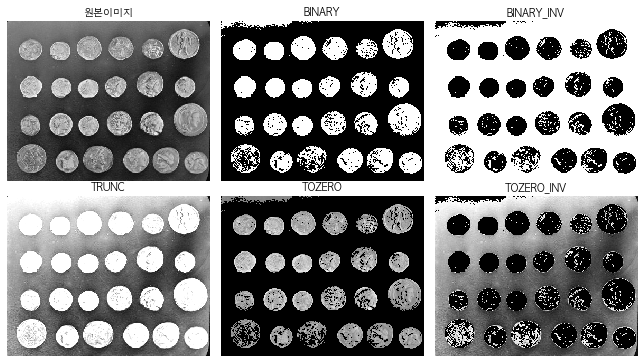

In [2]:
# 이미지 필터링
# Reference: https://datascienceschool.net/view-notebook/c4121d311aa34e6faa84f62ef06e43b0/

### 임계처리(thresholding)
# 하나의 fixel값에 대해 threshold값이 넘느냐 넘지 않느냐로 이진화
import cv2
from skimage.data import coins
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
%matplotlib inline

img = coins()
maxval = 255
thresh = maxval / 2.0

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)     #maxval: x > th, 0: else
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV) #0: x > th, maxval: else
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)      #thresh: x > th, maxval: else
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)     #itself: x > th, 0: else
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV) #0: x > th, itself: else

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9,5))
for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')
plt.tight_layout(pad=0.7)
plt.show()

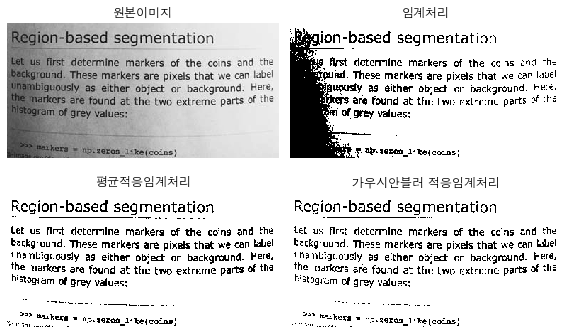

In [3]:
### 적응임계처리(adaptive thresholding) 
# 일정 영역내의 픽셀값을 이용하여 threshold 값을 자체적으로 계산
from skimage.data import page

img = page()
maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
c = 20
th2 = cv2.adaptiveThreshold(img, maxval, 
                            cv2.ADAPTIVE_THRESH_MEAN_C,     #thresh = 영역 내 평균값 - c 
                            cv2.THRESH_BINARY,              #threshold type 
                            k,                              #blocksize: 임계처리를 적용할 영역의 크기
                            c)                          
th3 = cv2.adaptiveThreshold(img, maxval, 
                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #thresh = gassian blur(x) - c
                            cv2. THRESH_BINARY, k, c)
images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

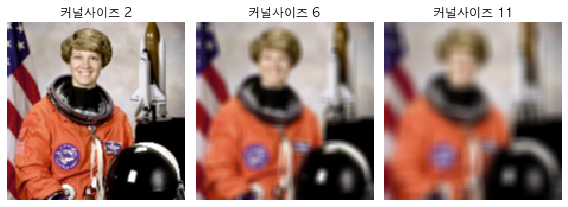

In [6]:
### 이미지 필터링
from skimage.data import astronaut
import numpy as np

img = astronaut()
img = cv2.resize(img, dsize=(150,150))

plt.figure(figsize=(8,3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel) 
    plt.subplot(1, 3, i+1)
    plt.imshow(filtering)
    plt.title("커널사이즈 {}".format(k))
    plt.axis("off")
plt.tight_layout()
plt.show()

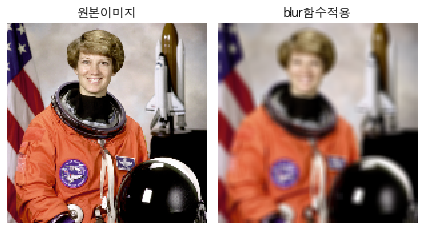

In [8]:
### 블러
# 1) 평균블러 
blur = cv2.blur(img, (5,5)) # kernel size of 5x5
boxfilter = cv2.boxFilter(img, -1, (5,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("원본이미지")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(blur)
plt.title("blur함수적용")
plt.axis("off")
plt.tight_layout()
plt.show()

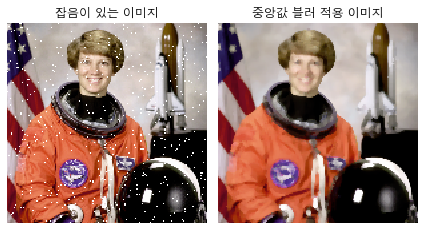

In [9]:
# 2) 중앙값 블러: 점 모양의 노이즈 제거에 효과적
img_noise = img.copy() # 노이즈 적용

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1,2,1)
plt.imshow(img_noise)
plt.title("잡음이 있는 이미지")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_denoise)
plt.title("중앙값 블러 적용 이미지")
plt.axis("off")
plt.tight_layout()
plt.show()

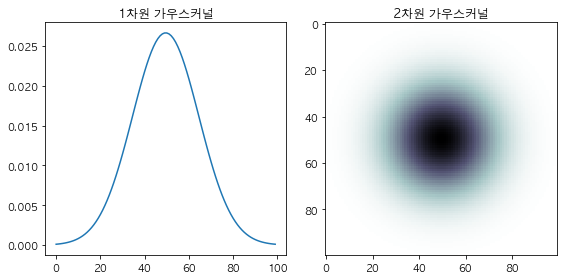

In [21]:
### 가우시안 블러
import matplotlib
gauss1d = cv2.getGaussianKernel(100,15)
gauss2d = gauss1d @ gauss1d.T

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(gauss1d)
plt.title("1차원 가우스커널")
plt.subplot(1,2,2)
plt.imshow(gauss2d, cmap=matplotlib.cm.bone_r)
plt.title("2차원 가우스커널")
plt.tight_layout()
plt.show()

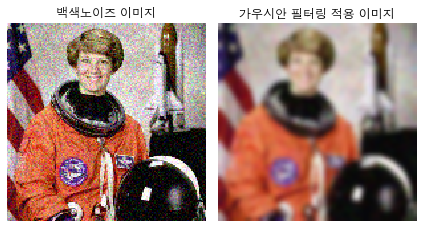

In [22]:
img_noise = np.clip((img/255 + np.random.normal(scale=0.1, size=img.shape))*255, 0, 255).astype('uint8')
img_denoise = cv2.GaussianBlur(img_noise, (9,9), 2)  # kernel size of 9x9, sigma of 2
plt.subplot(1,2,1)
plt.imshow(img_noise)
plt.title("백색노이즈 이미지")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링 적용 이미지")
plt.axis("off")
plt.tight_layout()
plt.show()

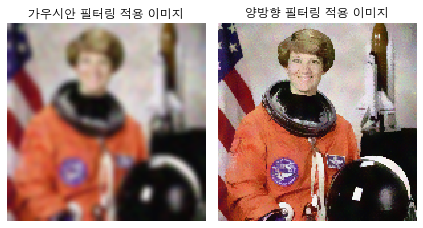

In [23]:
### 양방향 필터링(Bilateral Filtering)
# G(두 픽셀간의 거리)와 G(두 픽셀의 명암값 차이) 커널 적용
img_denoise1 = cv2.GaussianBlur(img_noise, (9,9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75) # sigmaColor and sigmaSpace are 75

plt.subplot(1,2,1)
plt.imshow(img_denoise1)
plt.title("가우시안 필터링 적용 이미지")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_denoise2)
plt.title("양방향 필터링 적용 이미지")
plt.axis("off")
plt.tight_layout()
plt.show()

In [24]:
### 형태학적 변환(Morphological transformation)
# 
# 커널 생성
cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) #사각형

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [26]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)) #타원형

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [27]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5)) #십자

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

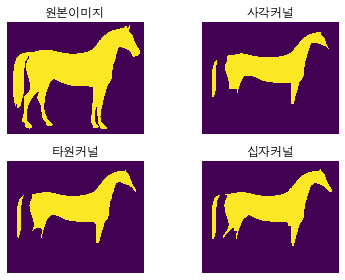

In [32]:
# 침식기법: 각 픽셀에 (morphing) 커널을 적용하여 커널 영역내 최소값으로 픽셀을 대체
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)    #사각형
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize) #타원형
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)   #십자형
title = ['원본이미지', '사각커널', '타원커널', '십자커널']
plt.subplot(2,2,1)
plt.imshow(img)
plt.title(title[0])
plt.axis("off")
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(erosion)
    plt.title(title[i+1])
    plt.axis("off")
plt.tight_layout()
plt.show()

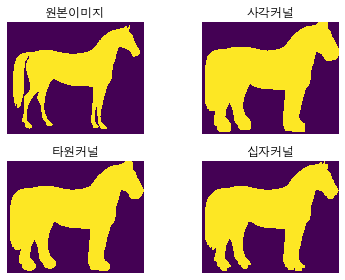

In [33]:
# 팽창(Dilation): 커널 영역내의 최대값으로 픽셀값 치환
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("원본이미지")
plt.axis("off")
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(erosion)
    plt.title(title[i+1])
    plt.axis("off")
plt.tight_layout()
plt.show()

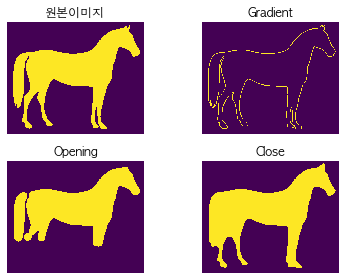

In [35]:
# 그레디언트: 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 방법
# 오프닝: 침식->팽창, 점 잡음, 작은 물체, 돌기 등 제거에 유용
# 클로징: 팽창->침식, 전체적 윤곽 파악에 적합
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel2)

images = [img, gradient, opening, closing]
titles = ["원본이미지", "Gradient", "Opening", "Close"]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()
